Dados para treino

In [55]:
from src.utils import get_path_project
import pandas as pd
import deltalake
from deltalake.writer import write_deltalake

#
dir_project = get_path_project()
path_deltalake = dir_project / "data/raw/yfinance_api"
path_deltalake_destino = dir_project / "data/staged/stock_history"


#
df = deltalake.DeltaTable(path_deltalake).to_pandas()

#
df_pivotado = pd.pivot_table(
    data=df,
    values="y",
    index="ds",
    columns="unique_id"
)

df_pivotado = df_pivotado.dropna(axis=0)
df_pivotado = df_pivotado.reset_index()
df_pivotado.rename(columns={"ds": "datetime"}, inplace=True)
df_pivotado["year_month"] = df_pivotado["datetime"].apply(lambda date: date.strftime(format="%Y-%m"))

#
write_deltalake(
    path_deltalake_destino, 
    df_pivotado, 
    mode="append", 
    partition_by=["year_month"]
)

In [147]:
from torch.utils.data import Dataset, DataLoader

class StockDataset(Dataset):
    def __init__(self, input_sequence_length:int, output_sequence_length:int) -> None:
        super().__init__()

        self.data = (
            deltalake.DeltaTable(path_deltalake_destino).to_pandas()
            .drop(columns=["year_month", "datetime"])
        )

        self.input_sequence_length = input_sequence_length
        self.output_sequence_length = output_sequence_length
        self.total_sequence_length = input_sequence_length + output_sequence_length

        return None

    def __len__(self) -> int:
        return len(self.data)

    def __getitem__(self, index):
        if index + self.total_sequence_length > len(self.data):
            raise StopIteration

        X = (
            self.data.reset_index().iloc[index:index+self.input_sequence_length,:].values
        )

        y = (
            self.data.reset_index().iloc[index+self.input_sequence_length:index+self.total_sequence_length,:].values
        )

        return X, y


dataset = StockDataset(input_sequence_length=14, output_sequence_length=7)
train_dataloader = DataLoader(dataset, batch_size=383, shuffle=False)

In [156]:
i = 1
for a, b in train_dataloader:
    c, d = a, b
    i+=1

In [157]:
i

5

In [149]:
c.shape

torch.Size([383, 14, 15])

In [150]:
d.shape

torch.Size([383, 7, 15])

In [152]:
d[-1]

tensor([[1545.0000,   13.9053,    9.9519,   11.4484,   11.6281,    3.5461,
          105.9352,    4.5072,   18.5835,    7.5340,   10.3580,    4.2288,
           17.1262,   15.4656,    6.3391],
        [1546.0000,   13.8979,    9.7024,   11.3793,   11.6205,    3.5461,
          105.3960,    4.4983,   18.6267,    7.5269,   10.3131,    4.1901,
           16.9227,   15.4538,    6.3391],
        [1547.0000,   13.9421,    9.7385,   11.4254,   11.7227,    3.5747,
          106.0109,    4.5118,   18.6748,    7.7804,   10.3195,    4.2079,
           16.9967,   15.7328,    6.4419],
        [1548.0000,   14.1186,   10.0240,   11.6674,   11.8967,    3.5747,
          103.7312,    4.5432,   18.7660,    8.0620,   10.1658,    4.3835,
           17.1385,   15.7684,    6.6201],
        [1549.0000,   14.3688,   10.3366,   11.6636,   11.9686,    3.6205,
          103.6555,    4.6197,   19.0877,    7.9564,   10.1017,    4.4103,
           17.0460,   15.6259,    6.7366],
        [1550.0000,   14.4865,   10

In [146]:
c[-1]

tensor([[1531.0000,   12.4157,   24.8500,   10.8910,   11.9283,   30.2542,
          114.3931,    9.2000,   32.4613,   38.0100,   23.0983,   36.9585,
           24.6600,   56.7100,   57.7170],
        [1532.0000,   12.3967,   24.5100,   10.7645,   11.7727,   29.6934,
          112.8400,    9.1700,   32.0416,   38.4400,   22.8704,   36.7271,
           24.2500,   55.8600,   57.5772],
        [1533.0000,   12.1693,   24.1600,   10.5601,   11.5781,   28.4143,
          112.1100,    9.0300,   31.6918,   39.4900,   23.1578,   36.5729,
           23.9500,   55.8300,   57.0280],
        [1534.0000,   12.4157,   24.4200,   10.6379,   11.6656,   28.7489,
          113.0200,    9.0400,   31.8617,   40.4700,   23.6900,   36.9199,
           24.6100,   56.1100,   57.8168],
        [1535.0000,   12.0934,   23.7400,   10.2000,   11.1792,   27.1747,
          111.3500,    8.7000,   30.9522,   38.9300,   23.3600,   35.9656,
           23.5600,   54.8100,   56.9681],
        [1536.0000,   12.1124,   23

In [ ]:
.data.reset_index().iloc[index:index+self.input_sequence_length,:].values

In [117]:
index = 1855
input_sequence_length = 14
df_pivotado.reset_index().iloc[index:index+input_sequence_length,:].values

array([[1855, Timestamp('2024-10-16 00:00:00'), 12.264041900634766,
        26.07499885559082, 12.838521003723145, 14.649225234985352,
        32.68436813354492, 96.32318878173828, 9.99078369140625,
        34.65264892578125, 33.133758544921875, 19.836589813232422,
        34.4979133605957, 28.689376831054688, 61.788509368896484,
        57.10786437988281, '2024-10'],
       [1856, Timestamp('2024-10-17 00:00:00'), 12.188220977783203,
        26.036022186279297, 12.896746635437012, 14.74623966217041,
        32.654850006103516, 96.1141128540039, 9.99078369140625,
        34.72187423706055, 33.6391716003418, 20.051464080810547,
        34.23832321166992, 28.541187286376953, 60.22248458862305,
        56.139259338378906, '2024-10'],
       [1857, Timestamp('2024-10-18 00:00:00'), 12.207176208496094,
        26.006792068481445, 12.945267677307129, 14.862658500671387,
        32.595821380615234, 96.85084533691406, 10.019113540649414,
        34.889991760253906, 33.736366271972656, 20.22726

In [108]:
df_pivotado.tail(n=50)


unique_id,datetime,ABEV3,BBAS3,BBDC3,BBDC4,BPAC11,DIS,ITSA4,ITUB4,JBSS3,KLBN11,PETR4,SANB11,VALE3,WEGE3,year_month
1865,2024-10-30,12.254564,25.694983,12.799706,14.581315,32.123558,94.660553,10.075771,34.860321,35.670547,20.305403,33.237038,27.950001,61.917358,53.922447,2024-10
1866,2024-10-31,11.979713,25.656006,12.363021,13.941017,31.995651,95.775612,10.019114,34.632870,34.999901,20.373772,33.292664,27.200001,61.510986,54.032288,2024-10
1867,2024-11-01,11.884937,25.422152,12.149531,13.688779,31.179037,95.387329,9.924683,34.442551,34.504208,20.530041,32.838379,26.799999,61.481251,54.621441,2024-11
1868,2024-11-04,12.008146,25.568312,12.127423,13.707212,32.566299,95.367424,10.075771,34.907585,35.077660,21.526266,32.912548,26.830000,62.115585,56.109299,2024-11
1869,2024-11-05,12.017624,25.578054,12.098271,13.532352,32.635170,96.203712,10.444052,35.956398,35.009621,21.584867,32.810562,26.870001,61.570454,55.929558,2024-11
1870,2024-11-06,11.847027,25.626774,11.933074,13.415776,32.743401,98.453743,10.425166,35.788193,35.923252,21.477430,32.819839,27.100000,60.876644,56.009445,2024-11
1871,2024-11-07,11.894415,25.519590,11.826181,13.270058,32.536785,98.493568,10.283519,35.263790,34.854111,20.725378,32.921818,27.010000,62.997715,55.689903,2024-11
1872,2024-11-08,11.685907,25.324711,11.699855,13.124340,31.975975,98.583168,10.094658,34.709698,33.989075,20.217499,33.542984,26.680000,60.093636,55.010880,2024-11
1873,2024-11-11,11.856504,25.344198,11.651267,13.075768,33.058239,100.415054,10.056886,34.749275,34.202904,20.305403,33.607883,26.370001,58.131153,55.410309,2024-11
1874,2024-11-12,11.922848,25.285736,11.573526,13.007766,33.353405,100.544479,9.990784,34.333710,34.698597,20.264317,34.238323,26.139999,56.812916,55.340405,2024-11


In [140]:
for i in range(1,512):
    if len(df_pivotado) % i == 0:
        print(i)

1
5
383


In [154]:
len(df_pivotado) / 383

5.0

In [139]:
1914 % 2

0

In [75]:
a.shape

torch.Size([64, 7, 14])

In [76]:
b.shape

torch.Size([64, 14])

# OLD

In [1]:
from src.custom_dataloader import SequenceDataset

In [2]:
from src.utils import get_path_project

get_path_project()

PosixPath('/home/alecrim/workspace/mle-tech-challenge-4')

In [39]:
import torch
from torch import nn
from torch.optim import AdamW

class LSTMRegressor(nn.Module):
    def __init__(self, input_size:int, hidden_size:int, num_layers:int, output_size:int) -> None:
        super().__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc1 = nn.Linear(in_features=hidden_size, out_features=output_size)
        return None
        
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.fc1(x)
        return x



# Definindo
input_size, hidden_size, num_layers, output_size = (14, 32, 1, 7)

lstm_regressor = LSTMRegressor(input_size, hidden_size, num_layers, output_size)
loss_fn = nn.MSELoss()
optimizer = AdamW(params=lstm_regressor.parameters(), lr=0.001)

In [17]:
A = torch.Tensor(range(14)).reshape(1,1,14)
B = 

In [27]:
import numpy as np

n_samples = 50
A = torch.Tensor(np.random.random(size=(n_samples,1,input_size)))
B = torch.Tensor(np.random.random(size=(n_samples,1,output_size)))

In [40]:
num_epochs = 500
loss_history = []

lstm_regressor.train()
for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = lstm_regressor(A)
    loss = loss_fn(y_pred, B)
    loss_history.append(loss.item())
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1} - Loss = {loss}")

Epoch 100 - Loss = 0.07857717573642731
Epoch 200 - Loss = 0.07316982001066208
Epoch 300 - Loss = 0.06609272956848145
Epoch 400 - Loss = 0.060204409062862396
Epoch 500 - Loss = 0.05498174950480461


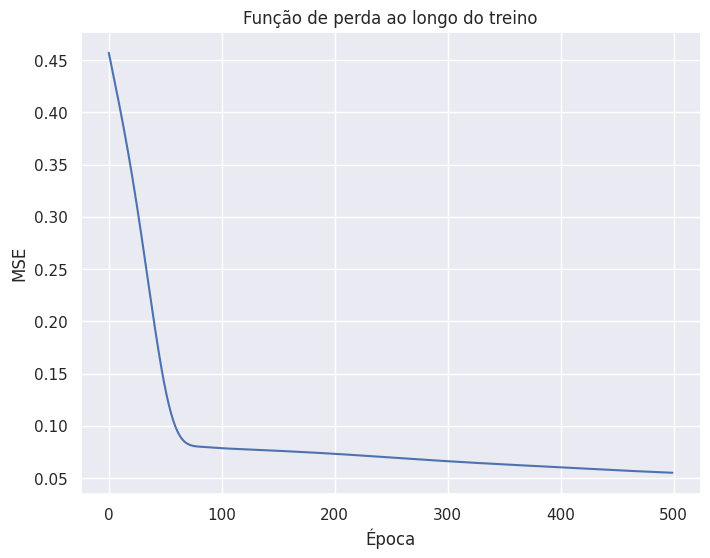

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme("notebook")
sns.set_style("darkgrid")

plt.figure(figsize=(8, 6))

sns.lineplot(data=loss_history)

plt.title("Função de perda ao longo do treino")
plt.xlabel("Época")
plt.ylabel("MSE")

plt.show()

In [1]:
import yfinance as yf
from datetime import datetime, timedelta

symbol = "VALE3"

now = datetime.now()
end = now - timedelta(days=1)
start = end - timedelta(days=5 + 1)
df = yf.download(f"{symbol}.SA", start=start, end=end)
display(df)
# df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,VALE3.SA,VALE3.SA,VALE3.SA,VALE3.SA,VALE3.SA
Date,,,,,
2025-01-10,51.520000,52.310001,51.230000,51.540001,25833900
2025-01-13,51.509998,52.310001,50.869999,52.000000,30845300
2025-01-14,51.849998,52.430000,51.630001,51.950001,21379000
2025-01-15,52.599998,52.680000,51.630001,52.139999,35137700
2025-01-16,52.669998,53.270000,52.000000,52.290001,220262800
